In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/dmasny99/techpark2021/main/hometasks/hometask%201/weatherAUS.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Date - Дата наблюдений
Location - Название локации, в которой расположена метеорологическая станция
MinTemp - Минимальная температура в градусах цельсия
MaxTemp - Максимальная температура в градусах цельсия
Rainfall - Количество осадков, зафиксированных за день в мм
Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
Sunshine - Число солнечных часов за день
WindGustDir - направление самого сильного порыва ветра за последние 24 часа
WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
WindDir9am - направление ветра в 9 утра

#  1) Работа с признаками

1.1) Смотрим сколько NaN у каждого признака

In [7]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

1.2) Удалим объекты датасета для которых RainTomorrow NaN. (Этих строк мало, думаю,что они общую картину не изменят)

In [8]:
df.dropna(axis = 0,subset = ['RainTomorrow'],inplace = True)

1.3) Заменим значения NaN на среднее значение для метрических признаков, на самое частовтречаемое для категориальных.

In [9]:
df.info() # определяем категориальные признаки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

1.4) Для категориальных признаков ('WindGustDir','WindDir9am','WindDir3pm','RainToday) заменим NaN 

In [10]:
f_cat = ['WindGustDir','WindDir9am','WindDir3pm','RainToday']
for i in f_cat:
    df[i].fillna(df[i].value_counts().idxmax(), inplace = True)


In [11]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

1.4) NaN в метрических признаков заменим средним значением 

In [12]:
df.fillna(df.mean(), inplace = True)

In [13]:
df.head() # проверяем корректность выполнения предыдущей операции

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [14]:
df.info() # видим, что значений NaN в датасете больше нет

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

1.5) Нанов больше нет. Воспользуемся LabelEncoding и поставим в соответсвие категориальным признакам Locaion, WindGustDir, WindDir9am числовые значения.

In [15]:
f_cat_to_le = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date']
le = LabelEncoder()
for i in f_cat_to_le:
    df[[i]]= df[[i]].apply( lambda x: le.fit_transform(x))


1.6) Пронормируем метрические признаки

In [16]:
from sklearn.preprocessing import MinMaxScaler
features_list = list(df.columns.values)
scale_features_mm = MinMaxScaler() 
for i in range(len(features_list)):
    scale_features_mm.fit(df[[features_list[i]]]) 
    df[[features_list[i]]] = scale_features_mm.fit_transform(df[[features_list[i]]])

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.115284,0.041667,0.516509,0.523629,0.001617,0.037723,0.525852,0.866667,0.294574,0.866667,...,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0
1,0.115575,0.041667,0.375000,0.565217,0.000000,0.037723,0.525852,0.933333,0.294574,0.400000,...,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0
2,0.115866,0.041667,0.504717,0.576560,0.000000,0.037723,0.525852,1.000000,0.310078,0.866667,...,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0
3,0.116157,0.041667,0.417453,0.620038,0.000000,0.037723,0.525852,0.266667,0.139535,0.600000,...,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0
4,0.116448,0.041667,0.613208,0.701323,0.002695,0.037723,0.525852,0.866667,0.271318,0.066667,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.0


1.7) Построим матрицу корреляции

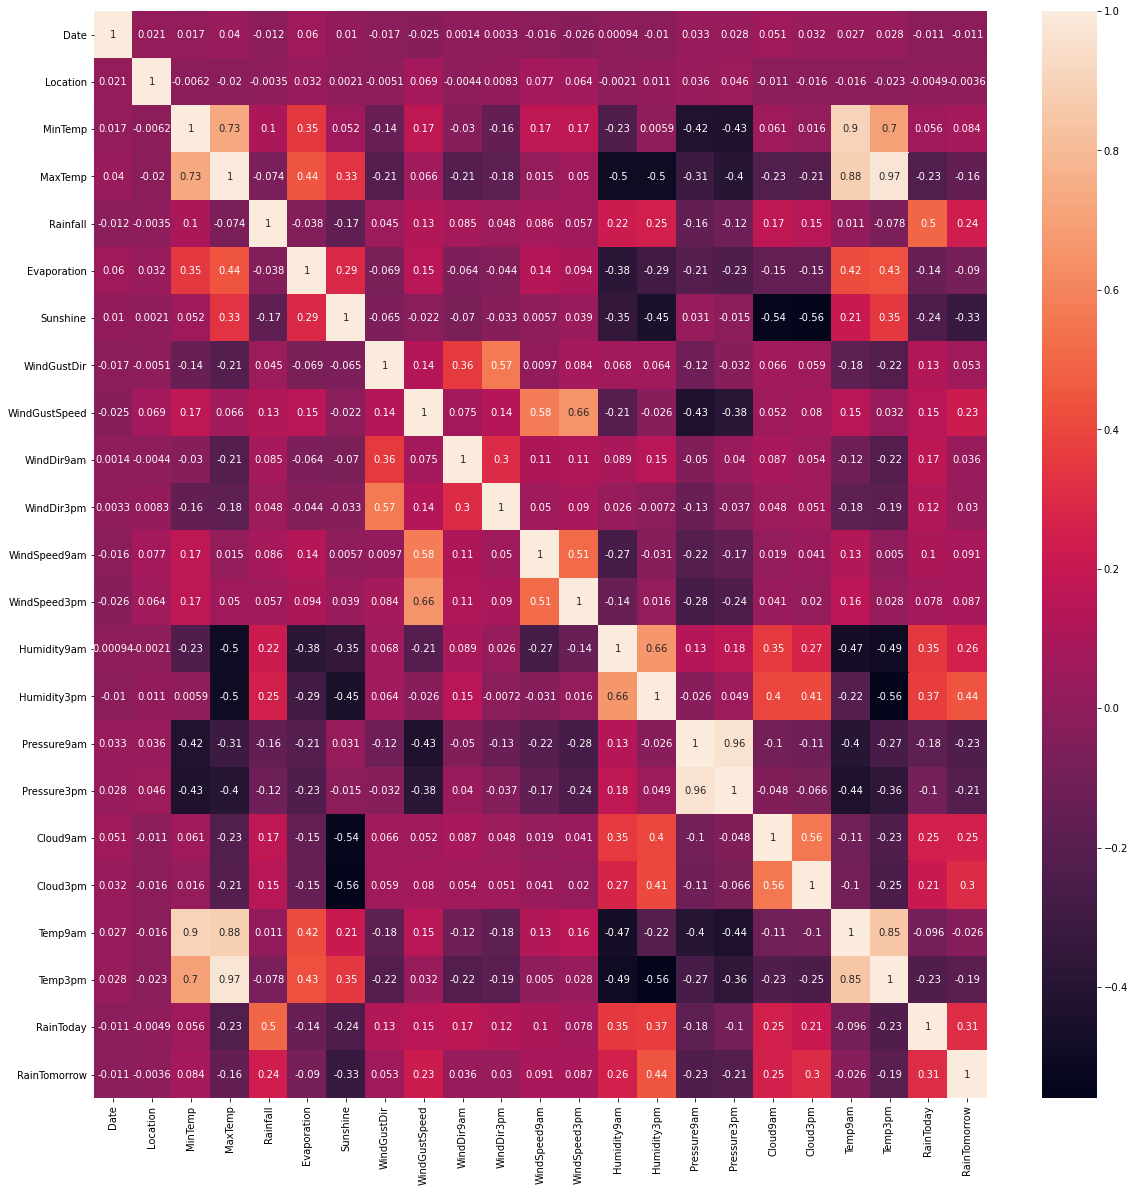

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True);

1.8) Построим гистограмму для таргета, чтобы понять существует ли дисбаланс классов или нет.

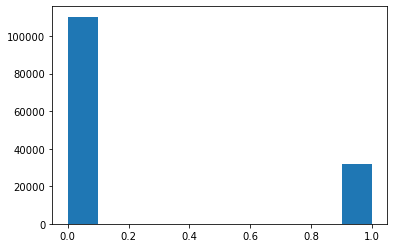

In [19]:
plt.figure()
plt.hist(df['RainTomorrow'])
plt.show()

Видно, что существует дисбаланс классов (RainToday = 0 в разы больше чем RainToday = 1), поэтому для оценки качества моделей метрика accuracy не репрезентативна, более подхлдящей является recall, которая говорит о доле правильно определенных дождливых дней среди всех дождливых дней, так же будем оценивать скорость работы алгоритмов. Однако все равно будем рассчитывать еще accuracy_score и precision, хотя, на мой взгляд, выбирать в данной задаче лушую модель нужно на основе recall, потому что банально "лучше взять дождь и не промокнуть, чем не взять и промокнуть".

1.9) Видно, что температура в 3 и в 9 коррелирует с 'MinTemp','MaxTemp', поэтому выкинем признаки 'MinTemp','MaxTemp', тк они не дают дополнительную информацию. Так же 'Pressure9am','Pressure3pm' коррелирую между собой, поэтому выкинем 'Pressure9am'. Так же 'Temp3pm' коррелирует с 'Temp9pm'.Выкинем 'Temp3pm'.

In [20]:
df.drop(['MinTemp','MaxTemp','Pressure9am','Temp3pm'], axis = 1, inplace = True)

In [21]:
Y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis = 1

1.9) Разбиваем данные на тренировочную и тестовую части.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, shuffle= False)

# 2) Наивный баесовский классификатор

In [27]:
%%time
# Принимаю гипотезу, что распределение признаков - гауссовское. (тк велечины непрерывные, другие распределения встроенные вмодуль не подходят)
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import  GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
prediction = nb.predict(X_test)
print('recall_score =',round(recall_score(y_test,prediction),3))
print('precision_score =',round(precision_score(y_test,prediction),3))
print('accuracy_score =',round(nb.score(X_test,y_test),3))

recall_score = 0.526
precision_score = 0.631
accuracy_score = 0.832
Wall time: 138 ms


# 3) Метод К-ближайших соседей

In [32]:
%%time 
from sklearn.neighbors import KNeighborsClassifier
'''
from sklearn.neighbors import KNeighborsClassifier
k = range(1,20)
res = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    res.append(round(recall_score(y_test,prediction),3))
    print(res)
    print(max(res))
    print(res.index(max(res))+1)
'''
# в результате работы цикла получил максимальное значение recall_score при k = 1, поэтому оставляю модель с k =1
#knn.score(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors=1, n_jobs = -1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('recall_score =',round(recall_score(y_test,prediction),3))
print('precision_score =',round(precision_score(y_test,prediction),3))
print('accuracy_score =',round(knn.score(X_test,y_test),3))

recall_score = 0.422
precision_score = 0.484
accuracy_score = 0.778
Wall time: 33.3 s


# 4) Логистическая регрессия

In [28]:
%%time
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty =  'l2', max_iter = 5000)
logreg.fit(X_train, y_train)
print('recall_score =',round(recall_score(y_test,prediction),3))
print('precision_score =',round(precision_score(y_test,prediction),3))
print('accuracy_score =',round(logreg.score(X_test,y_test),3))

recall_score = 0.526
precision_score = 0.631
accuracy_score = 0.846
Wall time: 1.18 s


#  Вывод

Полученные результаты представлены в таблице

In [35]:
dict ={'Naive Bayes': ['0.526','0.631','0.832','138 ms'], 'K-NN': ['0.422','0.484','0.778','33.3 s'], 
       'LogReg':['0.526','0.631','0.846','1.18 s']}
df_res = pd.DataFrame(dict, index = ['recall_score','precision_score','accuracy_score','time'])

In [36]:
df_res.head()

,Naive Bayes,K-NN,LogReg
recall_score,0.526,0.422,0.526
precision_score,0.631,0.484,0.631
accuracy_score,0.832,0.778,0.846
time,138 ms,33.3 s,1.18 s


Как видно из результатов сравнения моделей самый большой recall у наивного баеса и логистической регресси, однако логистическая регрессия выигрывает по accuracy, но проигрывает по времени работы алгоритма на порядок баесу. Метод ближайших соседей показал самый худший результат по всем параметрам. Подводя итог, для решение данной задачи классификации целесообразно использовать метод логистической регрессии, поскольку такая модель дает самые точные результаты при приемлемом времени работы алгоритма, но в целом, у модели низкий recall, поэтому предсказания, полученные на ее основе - плохие.